In [15]:
import numpy as np

import pandas as pd

import hdbscan

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [16]:
# Define the dataset path
dataset_path = "/Users/Dataghost/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1/Mall_Customers.csv"

# Load the dataset
df = pd.read_csv(dataset_path, encoding="ISO-8859-1")

# Display the first few rows
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [17]:
# Selecting relevant features

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [18]:
# Standardizing the data

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [19]:
# Different parameter settings

param_configs = [
    
    {'min_cluster_size': 5, 'min_samples':3}, # More granular clusters
    {'min_cluster_size': 10, 'min_samples':5}, # Balanced (default)
    {'min_cluster_size': 20, 'min_samples':10}, # Larger, stable clusters

]

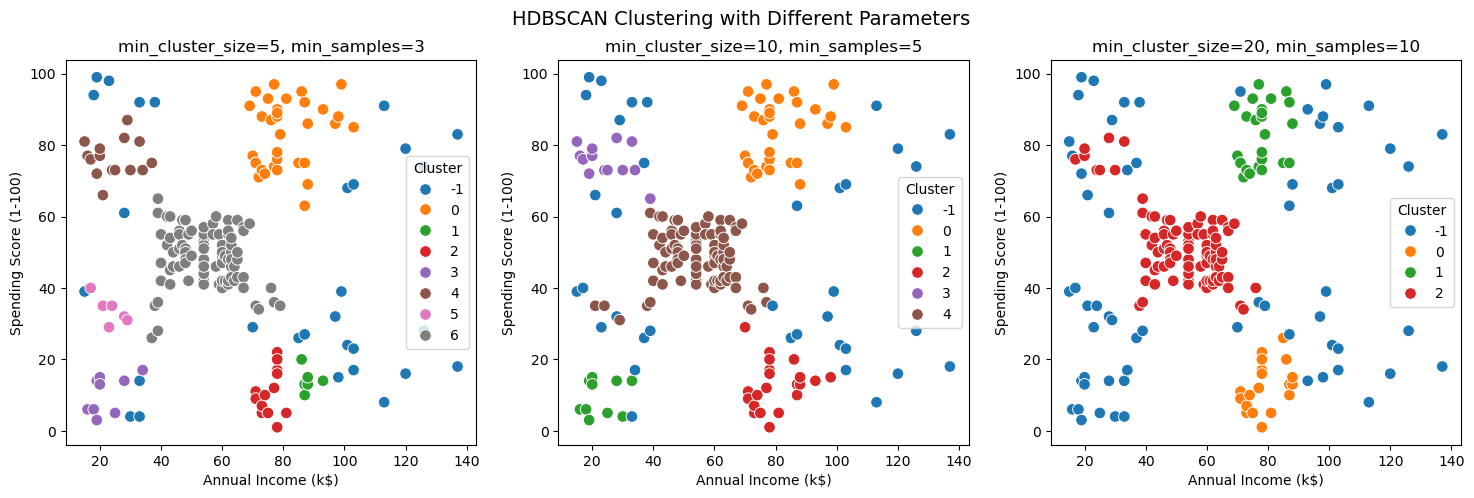

In [20]:
# Plot results

fig, axes = plt.subplots(1,3, figsize=(18,5))

for i , params in enumerate(param_configs):

    hdb = hdbscan.HDBSCAN(min_cluster_size=params['min_cluster_size'],
                          
                          min_samples=params['min_samples'],
                          metric='euclidean',
                          cluster_selection_method='eom'
                          
                          )
    
    labels = hdb.fit_predict(X_scaled)

    df['Cluster'] = labels  # Save labels in the dataset

    # Plot clusters

    sns.scatterplot(x=df['Annual Income (k$)'], 
                    y=df['Spending Score (1-100)'], 
                    hue=df['Cluster'],
                    palette='tab10',
                    s=70,
                    ax=axes[i]
                    
                    )
    
    axes[i].set_title(f"min_cluster_size={params['min_cluster_size']}, min_samples={params['min_samples']}")



plt.suptitle("HDBSCAN Clustering with Different Parameters", fontsize=14)

plt.show()



Observations

Small min_cluster_size=5 → More fragmented, small clusters

Balanced min_cluster_size=10 → Well-defined, compact clusters

Large min_cluster_size=20 → Fewer, stable clusters with more outliers